In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette='bright')

In [ ]:
months = np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
sales = np.array([4.14,  4.85,  7.34,  6.89,  8.27, 10.06,  8.11, 11.67, 10.45, 11.54, 13.4 , 14.42])

In [ ]:
df = pd.DataFrame({"month": months, "sales": sales})
df

,month,sales
0,1,4.14
1,2,4.85
2,3,7.34
3,4,6.89
4,5,8.27
5,6,10.06
6,7,8.11
7,8,11.67
8,9,10.45
9,10,11.54


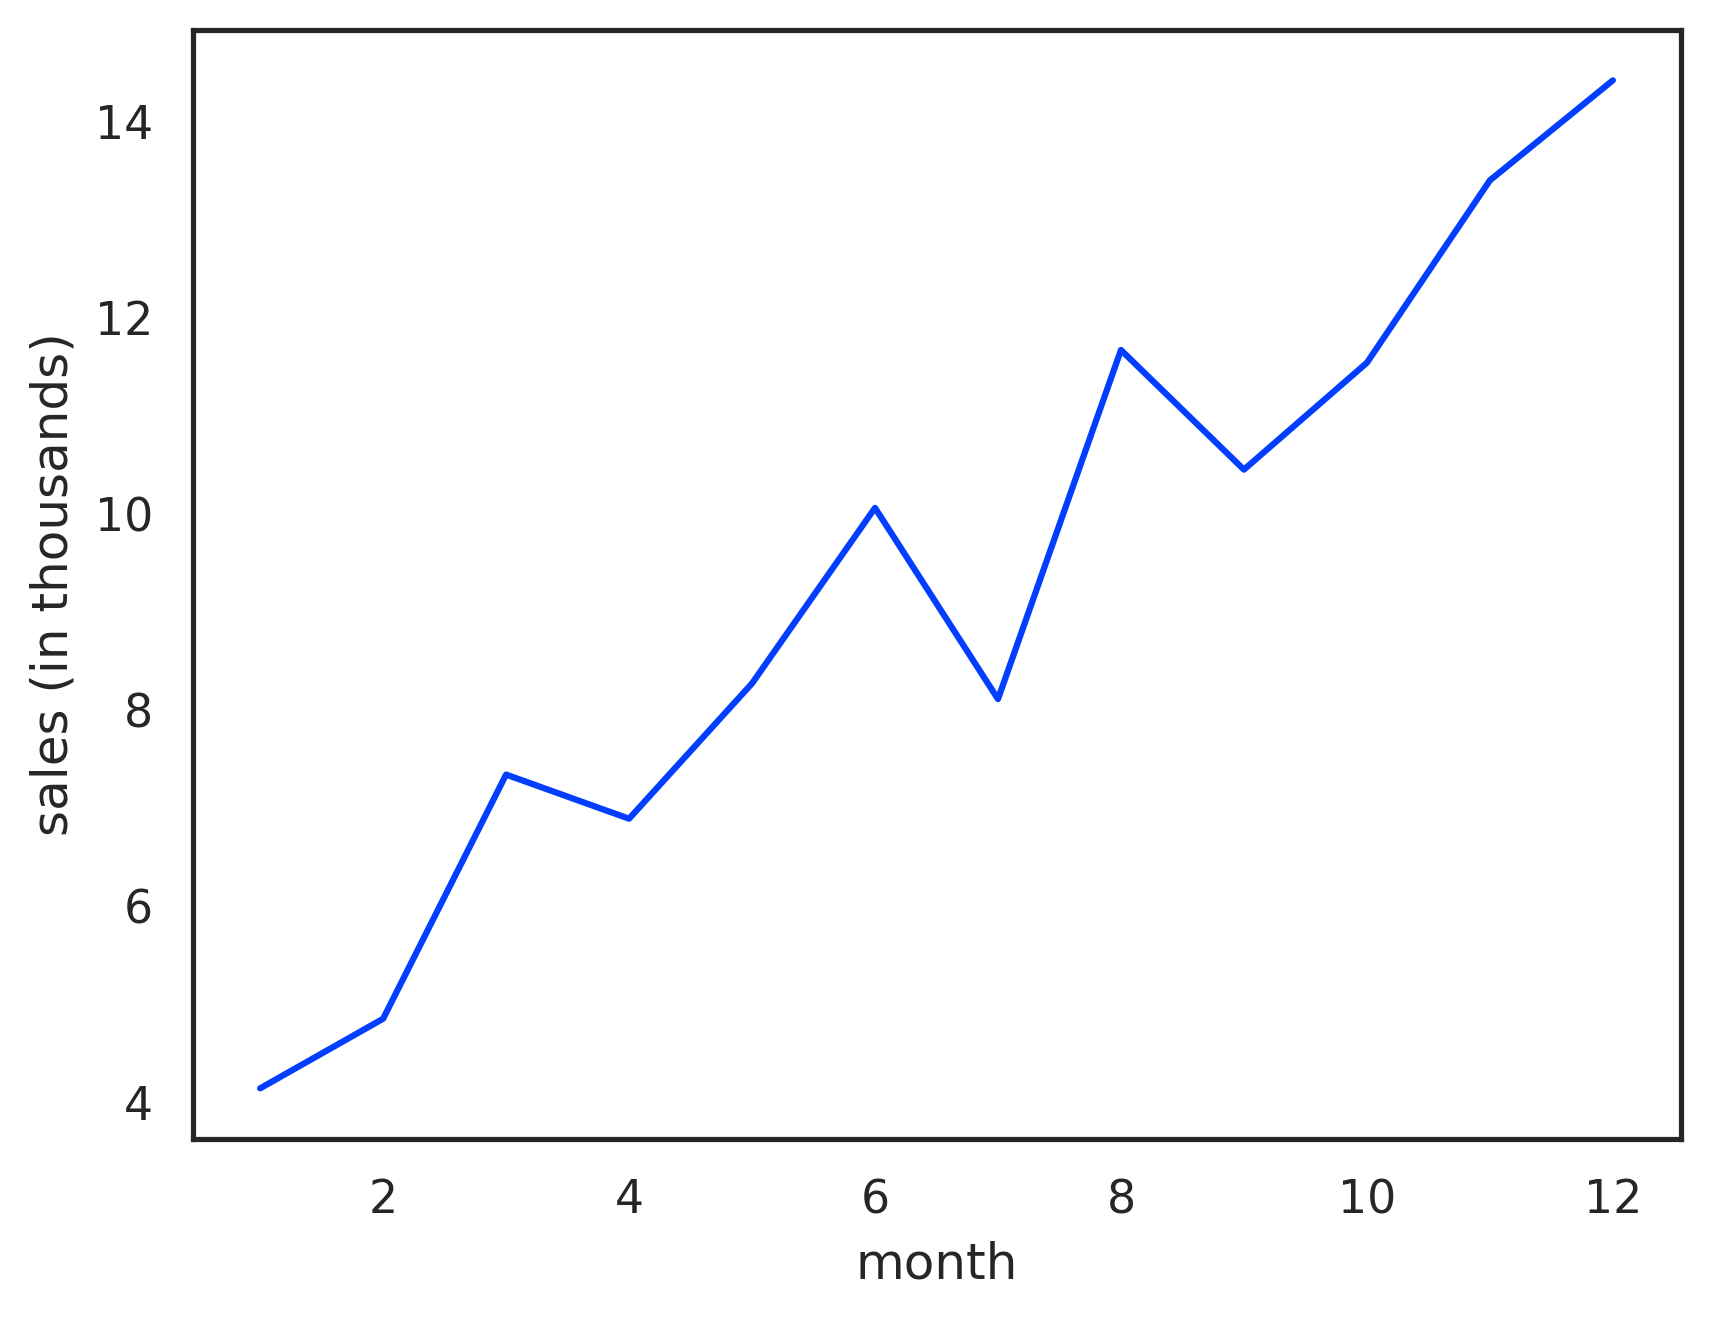

In [ ]:
plt.figure(dpi=300)
sns.lineplot(data=df, x='month', y='sales')
plt.xlabel("month")
plt.ylabel("sales (in thousands)")
plt.savefig("figures/ch1_linear_sales.png")

## Manual modelling example

In [ ]:
def linear_model(m, c, x):
    return m*x + c

In [ ]:
def msa(y, y_pred):
    return ((y - y_pred).abs()).mean()

In [ ]:
def guess(m, c):
    Y_pred = linear_model(m, c, df.month)
    return {'m': m, 'c': c, 'msa':  msa(df.sales, Y_pred)}

In [ ]:
guess1 = 0.1*df.month+4.

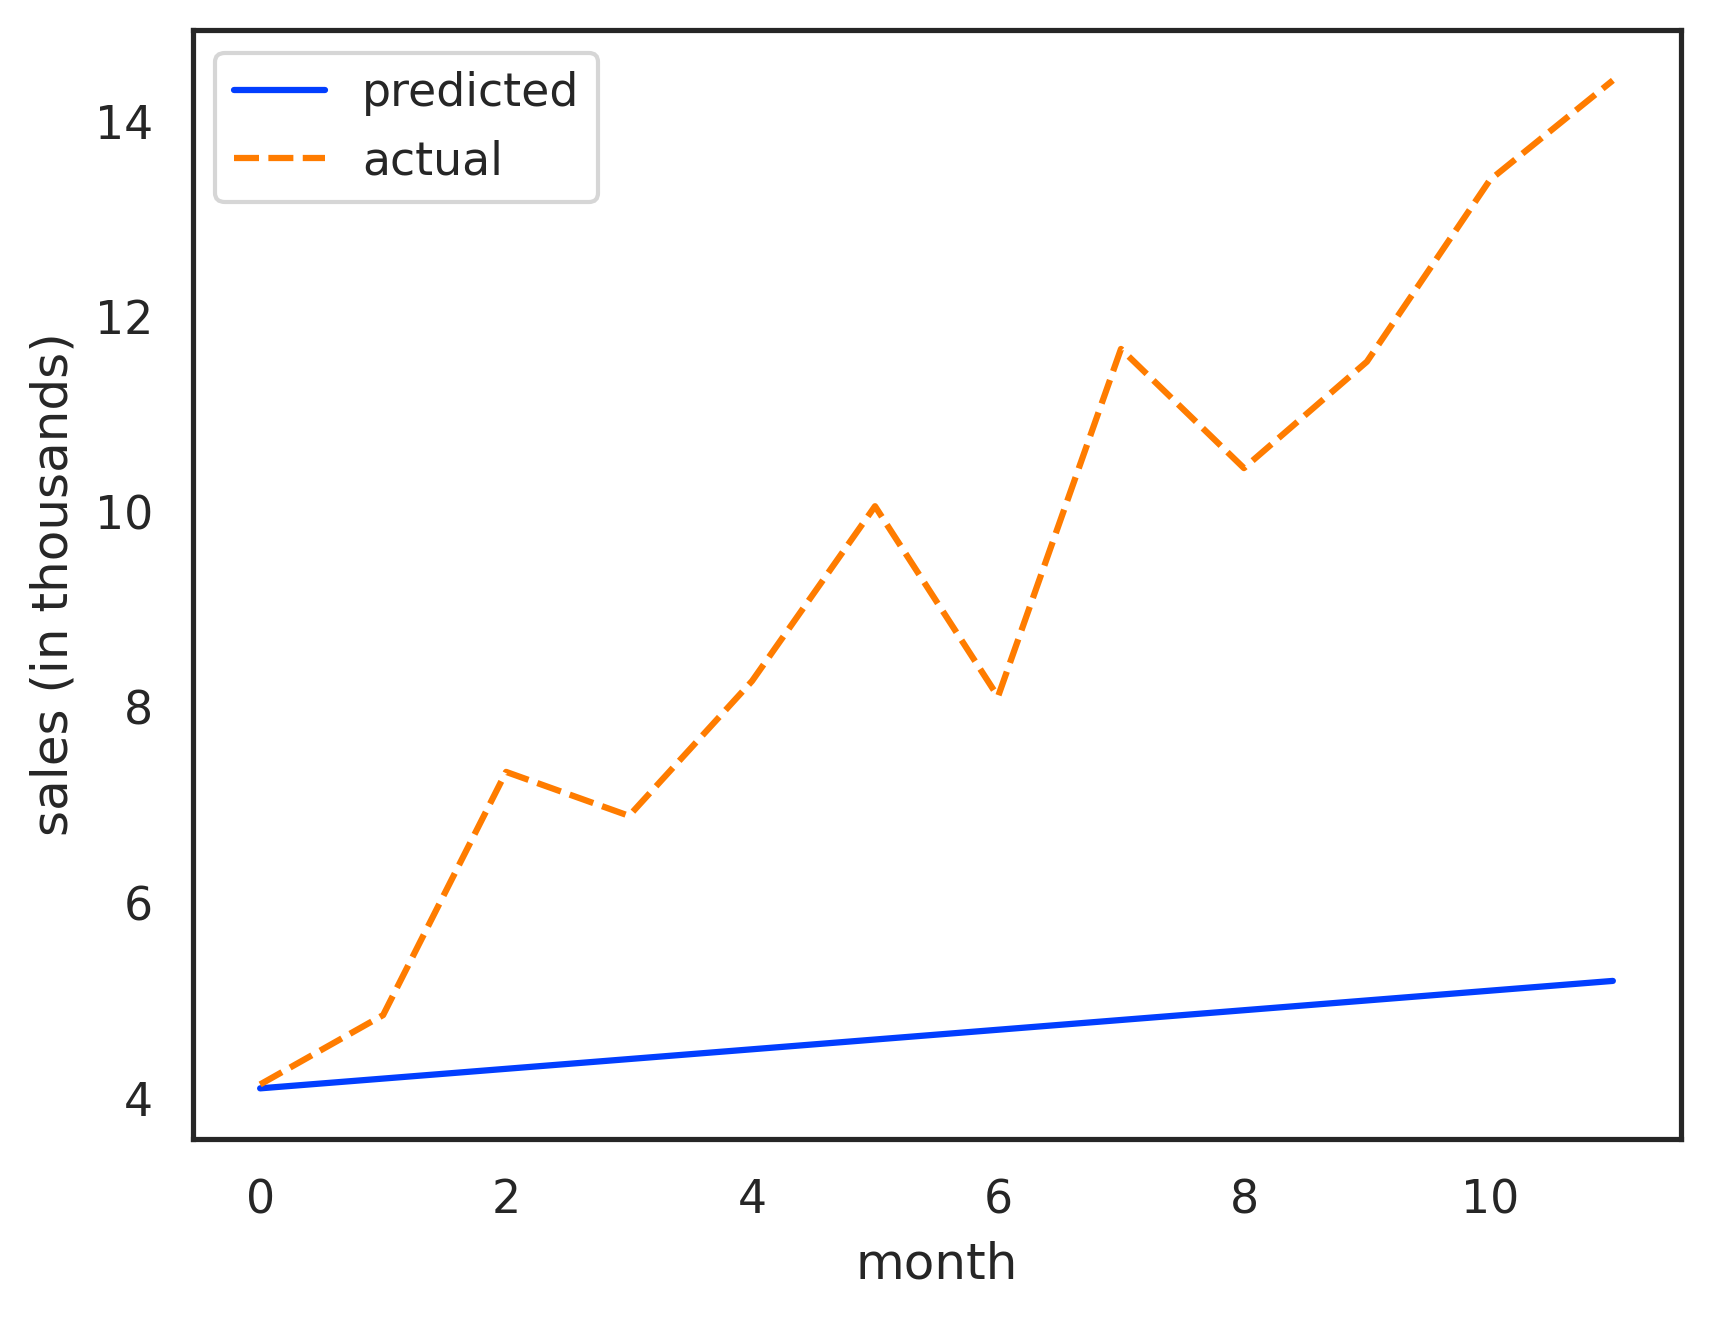

In [ ]:
plt.figure(dpi=300)
sns.lineplot(data={'predicted': guess1, 'actual': df.sales})
plt.xlabel("month")
plt.ylabel("sales (in thousands)")
plt.savefig("figures/ch1_linear_sales_guess.png")

In [ ]:
guess_df = pd.DataFrame([
    guess(0.1, 4),
    guess(0.2, 4.1),
    guess(0.3, 4.2),
    guess(0.4, 4.3),
    guess(0.5, 4.4),
])
guess_df

,m,c,msa
0,0.1,4.0,4.611667
1,0.2,4.1,3.888333
2,0.3,4.2,3.171667
3,0.4,4.3,2.496667
4,0.5,4.4,1.830000


## Linear Regression with scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
model = LinearRegression()
model = model.fit(df[['month']], df[['sales']])

predicted_sales = model.predict(df[['month']])

mean_absolute_error(predicted_sales, df[['sales']])

0.7400116550116557

In [ ]:
predicted_sales[:,0]

array([ 4.54089744,  5.39921911,  6.25754079,  7.11586247,  7.97418415,
        8.83250583,  9.69082751, 10.54914918, 11.40747086, 12.26579254,
       13.12411422, 13.9824359 ])

Text(0, 0.5, 'sales (in thousands)')

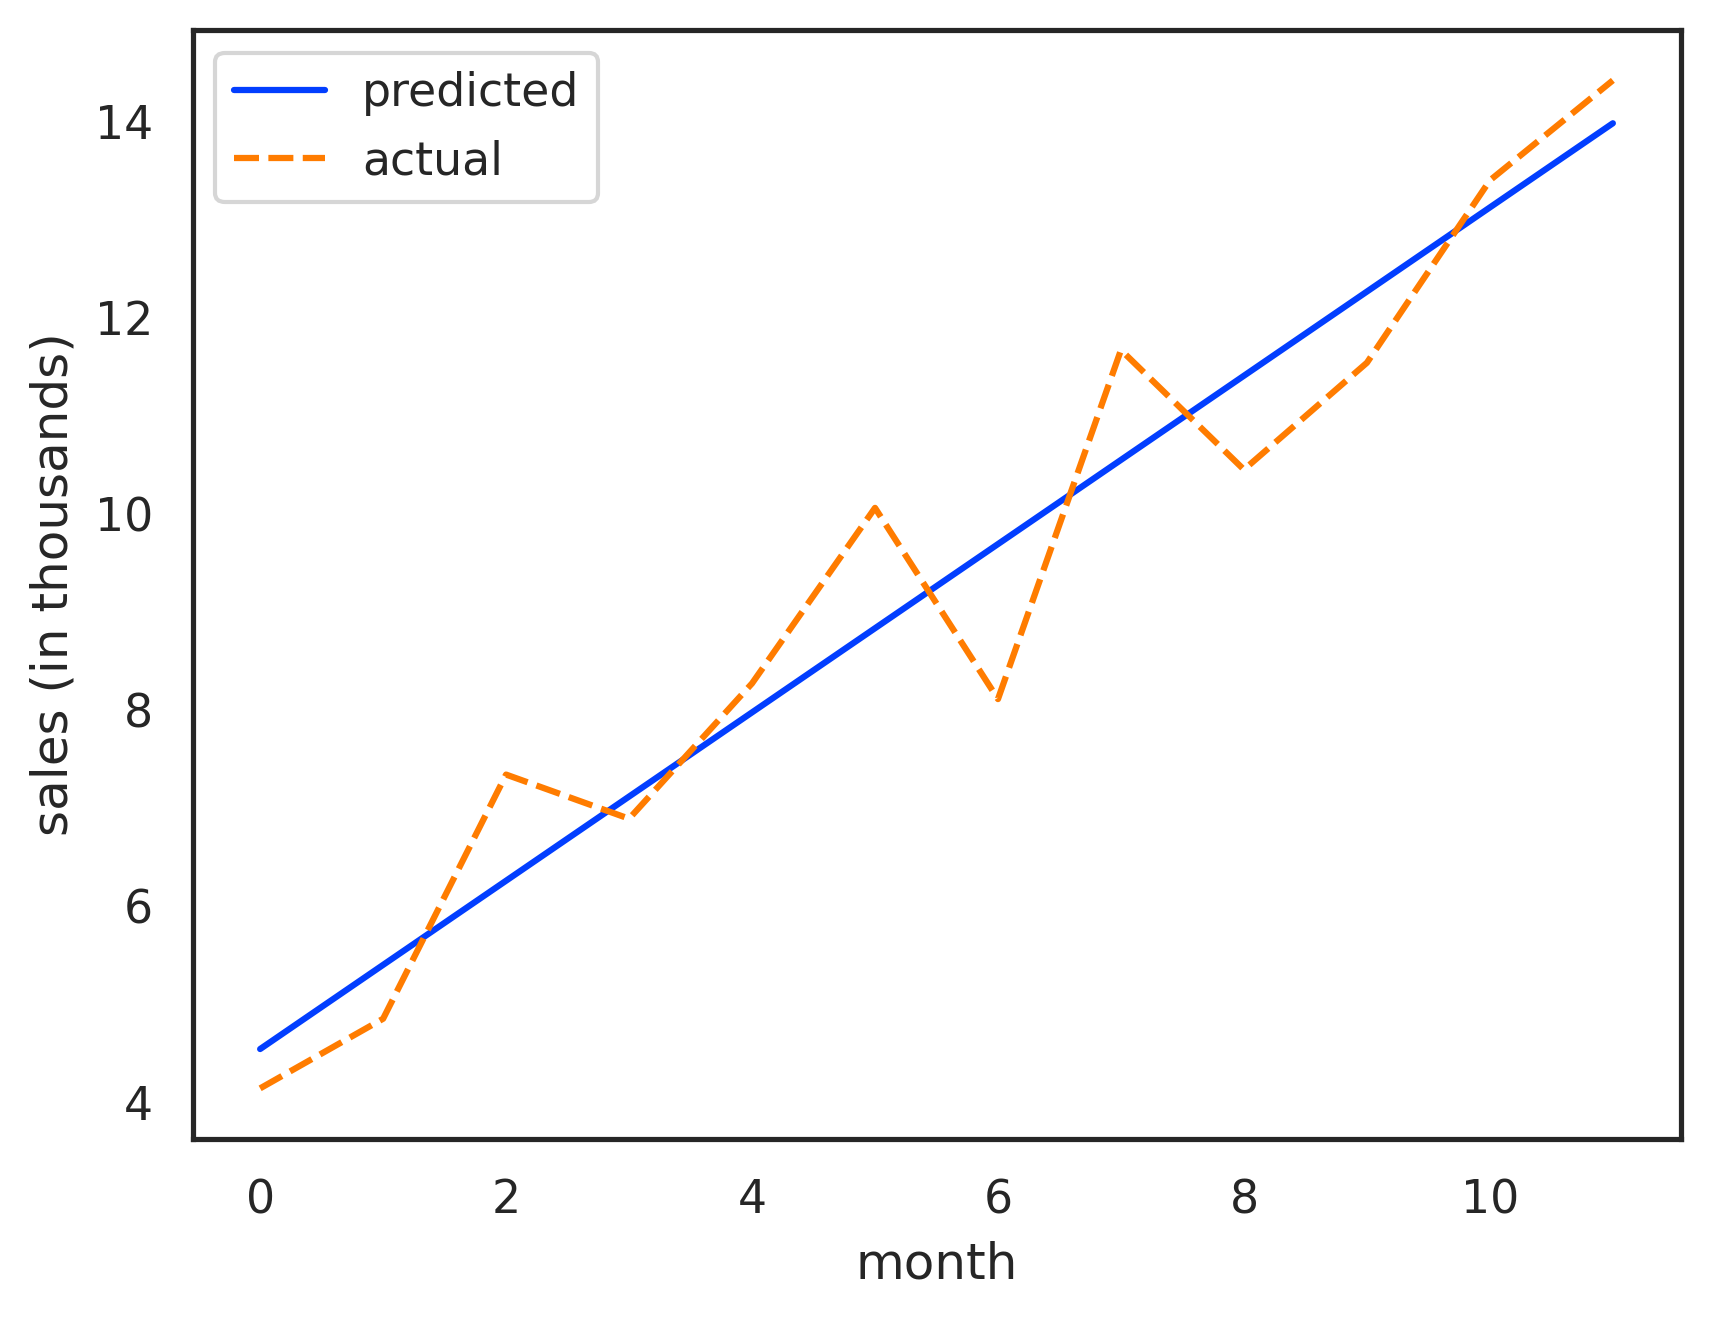

In [ ]:
plt.figure(dpi=300)
sns.lineplot(data={'predicted': predicted_sales[:,0], 'actual': df.sales})
plt.xlabel("month")
plt.ylabel("sales (in thousands)")

In [ ]:
model.coef_

array([[0.85832168]])

In [ ]:
model.intercept_

array([3.68257576])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=2)
tree = tree.fit(df[['month']], df[['sales']])

In [ ]:
predicted_sales_tree = tree.predict(df[['month']])

mean_absolute_error(predicted_sales_tree, df[['sales']])

0.517777777777778

<AxesSubplot: >

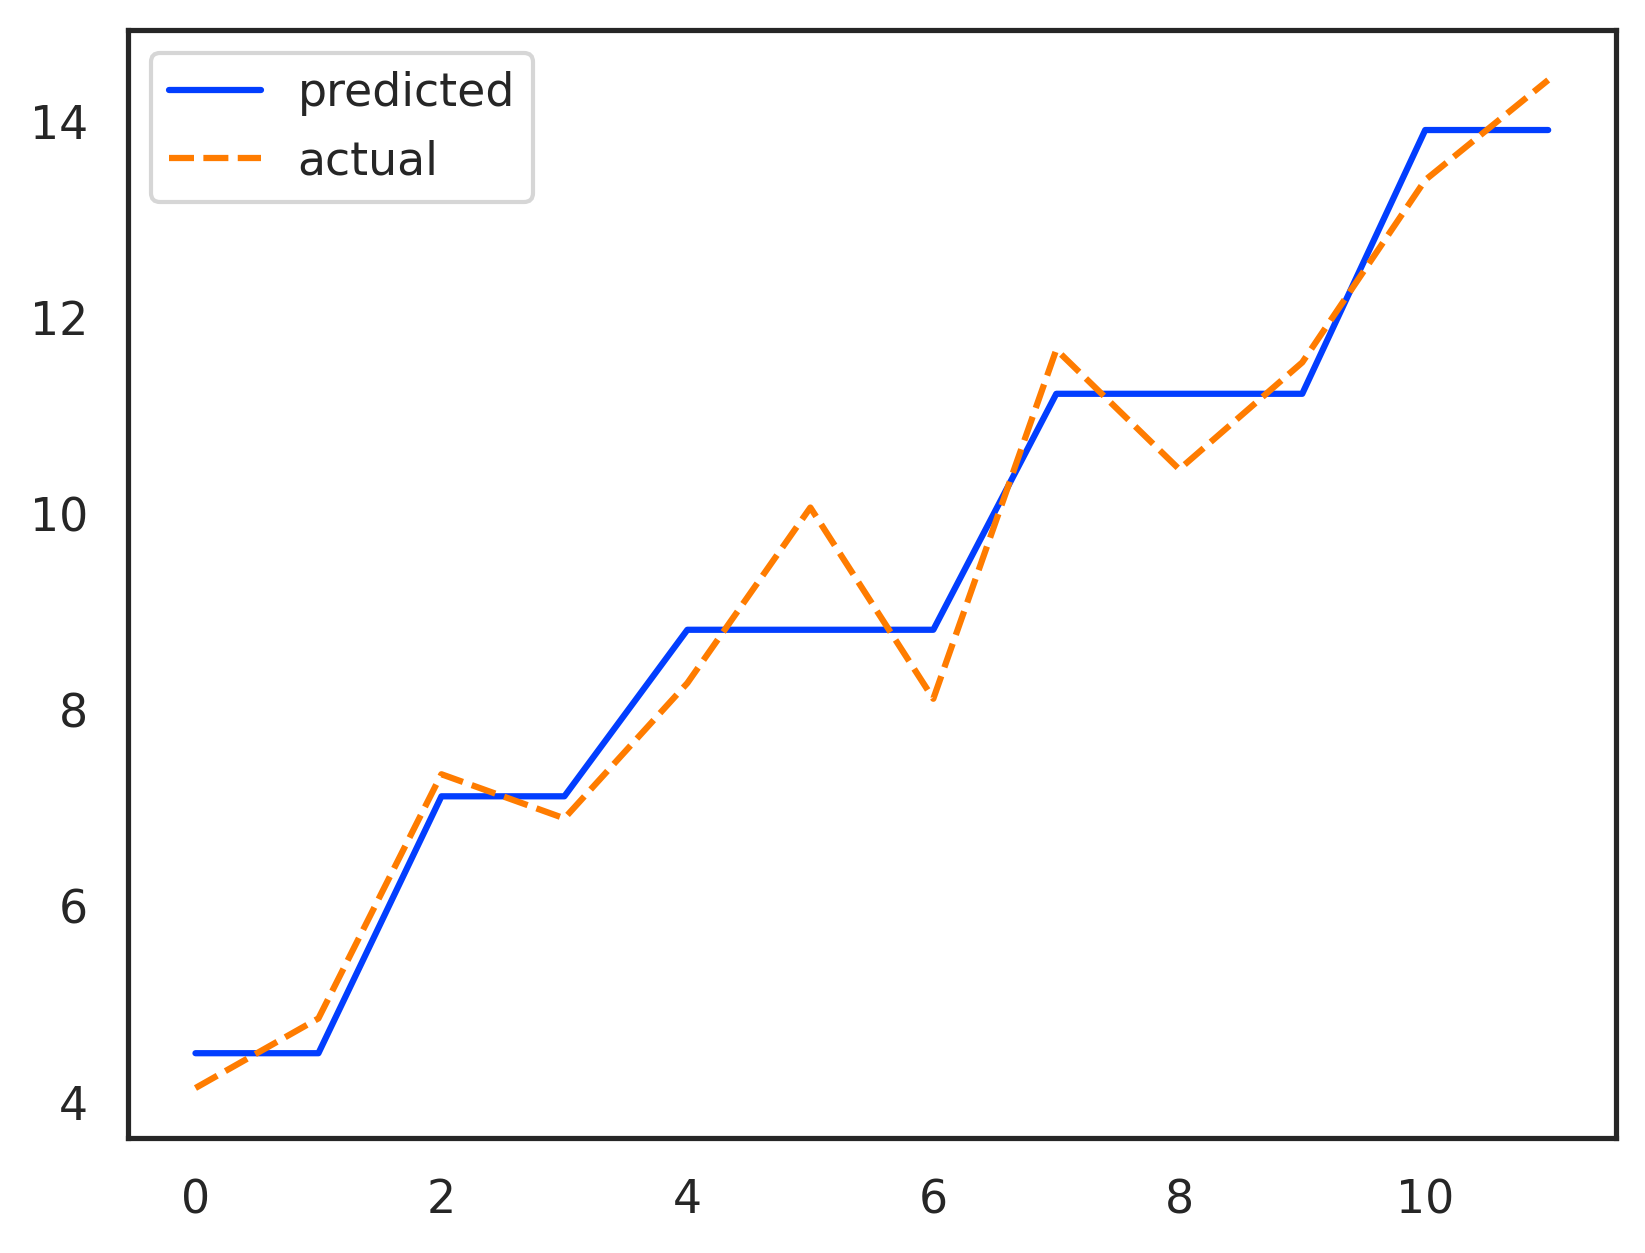

In [ ]:
plt.figure(dpi=300)
sns.lineplot(data={'predicted': predicted_sales_tree, 'actual': df.sales})